## Setting the T-to-T Transformer

In [3]:
import pickle, torch
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
from tqdm import tqdm
import matplotlib.pyplot as plt

class CustomDataset(Dataset):
    def __init__(self, entries, references):
        self.entries = entries
        self.references = references

    def __len__(self):
        return len(self.entries)

    def __getitem__(self, idx):
        entry = self.entries[idx]
        reference = self.references[idx]
        return entry, reference


def custom_collate_fn(batch):
    entries, references = zip(*batch)
    
    # Determine the max length in the batch for entries and references
    max_len_entry = max(entry.size(-1) for entry in entries)
    max_len_ref = max(ref.size(-1) for ref in references)
    
    # Pad entries
    padded_entries = [F.pad(entry, (0, max_len_entry - entry.size(-1))) for entry in entries]
    padded_entries = torch.stack(padded_entries, dim=0)
    
    # Pad references
    padded_references = [F.pad(ref, (0, max_len_ref - ref.size(-1))) for ref in references]
    padded_references = torch.stack(padded_references, dim=0)
    
    return padded_entries, padded_references

def plot_losses(train_losses, validation_losses):
    epochs = range(1, len(train_losses) + 1)
    plt.plot(epochs, train_losses, color='blue', label='Train Loss')
    plt.plot(epochs, validation_losses, color='orange', label='Validation Loss')
    plt.title('Train/Validation Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Losses')
    plt.legend()
    plt.savefig('./plots/phase2/train_val_loss_plot.png')
    plt.show()

## Load data 

#### Admitos Way (BERT Tokenizer)

In [2]:
phase2_path_train_src = '/data/admitosstorage/Phase_2/data_phase2/Admitos_way/final_input_train_data.pkl'
phase2_path_train_tgt = '/data/admitosstorage/Phase_2/data_phase2/Admitos_way/final_ref_train_data.pkl'

with open(phase2_path_train_src, 'rb') as f:
    train_source_caps = pickle.load(f)

with open(phase2_path_train_tgt, 'rb') as f:
    train_target_stories = pickle.load(f)

phase2_path_val_src = '/data/admitosstorage/Phase_2/data_phase2/Admitos_way/final_input_val_data.pkl'
phase2_path_val_tgt = '/data/admitosstorage/Phase_2/data_phase2/Admitos_way/final_ref_val_data.pkl'

with open(phase2_path_val_src, 'rb') as f:
    val_source_caps = pickle.load(f)

with open(phase2_path_val_tgt, 'rb') as f:
    val_target_stories = pickle.load(f)

phase2_path_test_src = '/data/admitosstorage/Phase_2/data_phase2/Admitos_way/final_input_test_data.pkl'
phase2_path_test_tgt = '/data/admitosstorage/Phase_2/data_phase2/Admitos_way/final_ref_test_data.pkl'

with open(phase2_path_test_src, 'rb') as f:
    test_source_caps = pickle.load(f)

with open(phase2_path_test_tgt, 'rb') as f:
    test_target_stories = pickle.load(f)

#### Admitos (Own Tokenizer)

In [3]:
phase2_path_train_src = '/data/admitosstorage/Phase_2/data_phase2/Admitos_way/train_caps_t4tok.pkl'
phase2_path_train_tgt = '/data/admitosstorage/Phase_2/data_phase2/Admitos_way/train_stories_t4tok.pkl'

with open(phase2_path_train_src, 'rb') as f:
    train_source_caps = pickle.load(f)

with open(phase2_path_train_tgt, 'rb') as f:
    train_target_stories = pickle.load(f)

phase2_path_val_src = '/data/admitosstorage/Phase_2/data_phase2/Admitos_way/val_caps_t4tok.pkl'
phase2_path_val_tgt = '/data/admitosstorage/Phase_2/data_phase2/Admitos_way/val_stories_t4tok.pkl'

with open(phase2_path_val_src, 'rb') as f:
    val_source_caps = pickle.load(f)

with open(phase2_path_val_tgt, 'rb') as f:
    val_target_stories = pickle.load(f)
    
phase2_path_test_src = '/data/admitosstorage/Phase_2/data_phase2/Admitos_way/test_caps_t4tok.pkl'
phase2_path_test_tgt = '/data/admitosstorage/Phase_2/data_phase2/Admitos_way/test_stories_t4tok.pkl'

with open(phase2_path_test_src, 'rb') as f:
    test_source_caps = pickle.load(f)

with open(phase2_path_test_tgt, 'rb') as f:
    test_target_stories = pickle.load(f)

#### Yingjin Way (BERT Tokenizer)

In [4]:
phase2_path_yingjin_train_a = '/data/admitosstorage/Phase_2/data_phase2/Yingjin_way/final_train_input_caps.pkl'
phase2_path_yingjin_train_b = '/data/admitosstorage/Phase_2/data_phase2/Yingjin_way/final_train_ref_stories.pkl'

with open(phase2_path_yingjin_train_a, 'rb') as f:
    train_source_caps = pickle.load(f)

with open(phase2_path_yingjin_train_b, 'rb') as f:
    train_target_stories = pickle.load(f)

phase2_path_yingjin_val_a = '/data/admitosstorage/Phase_2/data_phase2/Yingjin_way/final_val_input_caps.pkl'
phase2_path_yingjin_val_b = '/data/admitosstorage/Phase_2/data_phase2/Yingjin_way/final_val_ref_stories.pkl'

with open(phase2_path_yingjin_val_a, 'rb') as f:
    val_source_caps = pickle.load(f)

with open(phase2_path_yingjin_val_b, 'rb') as f:
    val_target_stories = pickle.load(f)

phase2_path_yingjin_test_a = '/data/admitosstorage/Phase_2/data_phase2/Yingjin_way/final_test_input_caps.pkl'
phase2_path_yingjin_test_b = '/data/admitosstorage/Phase_2/data_phase2/Yingjin_way/final_test_ref_stories.pkl'

with open(phase2_path_yingjin_test_a, 'rb') as f:
    test_source_caps = pickle.load(f)

with open(phase2_path_yingjin_test_b, 'rb') as f:
    test_target_stories = pickle.load(f)

#### Yingjin (Own Tokenizer)

In [5]:
phase2_path_yingjin_train_a = '/data/admitosstorage/Phase_2/data_phase2/Yingjin_way/train_caps_t4tok.pkl'
phase2_path_yingjin_train_b = '/data/admitosstorage/Phase_2/data_phase2/Yingjin_way/train_stories_t4tok.pkl'

with open(phase2_path_yingjin_train_a, 'rb') as f:
    train_source_caps = pickle.load(f)

with open(phase2_path_yingjin_train_b, 'rb') as f:
    train_target_stories = pickle.load(f)

phase2_path_yingjin_val_a = '/data/admitosstorage/Phase_2/data_phase2/Yingjin_way/val_caps_t4tok.pkl'
phase2_path_yingjin_val_b = '/data/admitosstorage/Phase_2/data_phase2/Yingjin_way/val_stories_t4tok.pkl'

with open(phase2_path_yingjin_val_a, 'rb') as f:
    val_source_caps = pickle.load(f)

with open(phase2_path_yingjin_val_b, 'rb') as f:
    val_target_stories = pickle.load(f)
    
phase2_path_yingjin_test_a = '/data/admitosstorage/Phase_2/data_phase2/Yingjin_way/test_caps_t4tok.pkl'
phase2_path_yingjin_test_b = '/data/admitosstorage/Phase_2/data_phase2/Yingjin_way/test_stories_t4tok.pkl'

with open(phase2_path_yingjin_test_a, 'rb') as f:
    test_source_caps = pickle.load(f)

with open(phase2_path_yingjin_test_b, 'rb') as f:
    test_target_stories = pickle.load(f)

### Run the Training Loop

In [6]:
## Load the neccesary vocabs
name = 'admitos'
#name = 'yingjin'
vocab_total_dii_vocab = f'/data/admitosstorage/Phase_2/data_phase2/{name.capitalize()}_way/Vocabs/{name}_dii_vocab.pkl'
vocab_total_sis_vocab = f'/data/admitosstorage/Phase_2/data_phase2/{name.capitalize()}_way/Vocabs/{name}_sis_vocab.pkl'
vocab_combined = f'/data/admitosstorage/Phase_2/data_phase2/{name.capitalize()}_way/Vocabs/all_{name}_vocab.pkl'

with open(vocab_total_dii_vocab, 'rb') as f:
    dii_vocab = pickle.load(f)

with open(vocab_total_sis_vocab, 'rb') as f:
    sis_vocab = pickle.load(f)

with open(vocab_combined, 'rb') as f:
    total_vocab = pickle.load(f)

print("The input-captions vocabulary is: ", len(dii_vocab))
print("The target-stories vocabulary is: ", len(sis_vocab))
print("The combined vocabulary is: ", len(total_vocab))

The input-captions vocabulary is:  32745
The target-stories vocabulary is:  34603
The combined vocabulary is:  49535


In [7]:
b_s = 8
final_train_dataset = CustomDataset(train_source_caps, train_target_stories)
final_val_dataset = CustomDataset(val_source_caps, val_target_stories)
final_test_dataset = CustomDataset(test_source_caps, test_target_stories)

final_train_dataloader = DataLoader(final_train_dataset, batch_size=b_s, shuffle=True, collate_fn=custom_collate_fn)
final_val_dataloader = DataLoader(final_val_dataset, batch_size=b_s, shuffle=True, collate_fn=custom_collate_fn)
final_test_dataloader = DataLoader(final_test_dataset, batch_size=b_s, shuffle=True, collate_fn=custom_collate_fn)

In [8]:
print("Train lenth:", len(final_train_dataloader))
print("Validation lenth:", len(final_val_dataloader))
print("Test lenth:", len(final_test_dataloader))
print()

for x1,x2 in final_train_dataloader:
    print(x1.shape)
    print(x2.shape)
    break
    
print()
for x1,x2 in final_val_dataloader:
    print(x1.shape)
    print(x2.shape)
    break

print()
for x1,x2 in final_test_dataloader:
    print(x1.shape)
    print(x2.shape)
    break

Train lenth: 3322
Validation lenth: 415
Test lenth: 418

torch.Size([8, 5, 21])
torch.Size([8, 1, 71])

torch.Size([8, 5, 22])
torch.Size([8, 1, 102])

torch.Size([8, 5, 25])
torch.Size([8, 1, 88])


In [9]:
from t4 import T4Transformer, T4tokenizer
import torch.optim as optim
from torch.nn import CrossEntropyLoss
from transformers import BertTokenizer, get_linear_schedule_with_warmup

use_bert = True
if use_bert:
    tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
    vocabulary_size_input = len(tokenizer.vocab) # BERT's vocabulary size
    vocabulary_size_target = len(tokenizer.vocab) # BERT's vocabulary size
    
else:
    tokenizer = T4tokenizer(total_vocab)
    vocabulary_size_input = len(tokenizer.get_vocab()) # number of unique tokens in all of Inputs
    vocabulary_size_target = len(tokenizer.get_vocab()) # number of unique tokens in all of Targets

print(f"The length of Input and Ouput Vocabularies are {vocabulary_size_input} and {vocabulary_size_target} respectively")

embedding_dim = 768
number_layers = 6
number_heads = 12
feed_forward_dim = 2048
my_device = torch.device('cuda:0') if torch.cuda.is_available() else "cpu"
print("DEVICE USED: ", my_device)

model = T4Transformer(vocab_size_input=vocabulary_size_input, vocab_size_target=vocabulary_size_target, d_model=embedding_dim, num_layers=number_layers, 
                    num_heads=number_heads, d_ff=feed_forward_dim, dropout=0.2, pad_token=0, device=my_device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

/home/apassadaki/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The length of Input and Ouput Vocabularies are 28996 and 28996 respectively
DEVICE USED:  cuda:0


In [10]:
def compute_loss(output, target):
    loss_fn = CrossEntropyLoss(ignore_index=0)
    loss = loss_fn(output, target)
    return loss

def flat_over_img_caps(source):
    if len(source.shape)<3:
        return source
    if len(source.shape)==3:
        if (source.shape[0]==5 and source.shape[1]==3) or (source.shape[0]==5 and source.shape[1]==2):
            source = source.reshape(-1, source.size(-1)) 
            return source
        else:
            return source
    if len(source.shape)==4:
        source = source.reshape(source.size(0), -1, source.size(-1))
        return source
    assert len(source.shape)>4, f"AssertionError: The length of the source is more than 4!"

print("The trainable parameters of the model are: ", count_parameters(model))

The trainable parameters of the model are:  136347844


In [105]:
num_epochs = 10
train_loss_per_epoch = []
val_loss_per_epoch = []
model = model.to(my_device)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=1000, num_training_steps=num_epochs*len(final_train_dataloader))

for epoch in range(num_epochs):
    # -------------------------------------- Training loop --------------------------------------
    print("------------------------------------------ Training loop ------------------------------------------------")
    epoch_train_loss = 0.0
    model.train()  # Set model to training mode

    accumulation_steps = 2  # or more
    for it, (input_data, target_data) in tqdm(enumerate(final_train_dataloader), total=len(final_train_dataloader),  desc="Processing Train items", ncols=100):
        #src = input_data[:, :, 0:2, :] # For 4D input data
        src = input_data
        tgt = target_data
        if src.shape[0] == 1:
           src = src.squeeze(0)  # Remove batch dimension
           tgt = tgt.squeeze(0)  # Remove batch dimension

        src = flat_over_img_caps(src)
        model.zero_grad()
        #optimizer.zero_grad()
        output = model(src.to(my_device), tgt.to(my_device))
        last_out_train = output
        train_loss = compute_loss(output.contiguous().view(-1,vocabulary_size_target), tgt.squeeze(0).contiguous().view(-1).to(my_device))
        train_loss = train_loss/accumulation_steps
        train_loss.backward()
        if (it+1)%accumulation_steps == 0:
            optimizer.step()
            scheduler.step()
            optimizer.zero_grad()
        print(f"Epoch: {epoch+1}, Iteration [{it+1}/{len(final_train_dataloader)}] --> Train Loss: {train_loss.item()}")
        epoch_train_loss += train_loss.item()
        if it%5==0:
            torch.cuda.empty_cache()
        # if it>=999:
        #     break

    avg_train_loss = epoch_train_loss/len(final_train_dataloader)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Avg Train Loss: {avg_train_loss:.4f}")
    train_loss_per_epoch.append(avg_train_loss)

    # ----------------------------------------- Validation loop -----------------------------------------
    print("------------------------------------------ Validation loop ------------------------------------------------")
    epoch_val_loss = 0.0
    model.eval()  # Set model to evaluation mode
    
    with torch.no_grad():  # Disable gradient calculation for validation
        for it, (input_data, target_data) in tqdm(enumerate(final_val_dataloader),total=len(final_val_dataloader), desc="Processing Validation items", ncols=100):
            #src = input_data[:, :, 0:2, :] # For 4D input data
            src = input_data
            tgt = target_data
            if src.shape[0] == 1:
                src = src.squeeze(0)  # Remove batch dimension
                tgt = tgt.squeeze(0)  # Remove batch dimension

            src = flat_over_img_caps(src)
            output = model(src.to(my_device), tgt.to(my_device))

            val_loss = compute_loss(output.contiguous().view(-1, vocabulary_size_target), tgt.squeeze(0).contiguous().view(-1).to(my_device))
            print(f"Epoch: {epoch+1}, Iteration [{it+1}/{len(final_val_dataloader)}] --> Validation Loss: {val_loss.item()}")
            epoch_val_loss += val_loss.item()
            if it%5==0:
                torch.cuda.empty_cache()
    
    avg_val_loss = epoch_val_loss/len(final_val_dataloader)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Avg Val Loss: {avg_val_loss:.4f}")
    val_loss_per_epoch.append(avg_val_loss)
    
print()
print("Training finished!")

------------------------------------------ Training loop ------------------------------------------------


Processing Train items:   0%|                                              | 0/3322 [00:00<?, ?it/s]

Epoch: 1, Iteration [1/3322] --> Train Loss: 5.558104038238525


Processing Train items:   0%|                                      | 2/3322 [00:00<05:40,  9.75it/s]

Epoch: 1, Iteration [2/3322] --> Train Loss: 5.58492374420166
Epoch: 1, Iteration [3/3322] --> Train Loss: 5.561428070068359


Processing Train items:   0%|                                      | 4/3322 [00:00<05:08, 10.74it/s]

Epoch: 1, Iteration [4/3322] --> Train Loss: 5.599481582641602
Epoch: 1, Iteration [5/3322] --> Train Loss: 5.538896560668945


Processing Train items:   0%|                                      | 6/3322 [00:00<05:56,  9.29it/s]

Epoch: 1, Iteration [6/3322] --> Train Loss: 5.492788314819336


Processing Train items:   0%|                                      | 8/3322 [00:00<05:09, 10.71it/s]

Epoch: 1, Iteration [7/3322] --> Train Loss: 5.483996391296387
Epoch: 1, Iteration [8/3322] --> Train Loss: 5.53447961807251
Epoch: 1, Iteration [9/3322] --> Train Loss: 5.494539737701416


Processing Train items:   0%|                                     | 10/3322 [00:00<05:01, 10.97it/s]

Epoch: 1, Iteration [10/3322] --> Train Loss: 5.436890125274658
Epoch: 1, Iteration [11/3322] --> Train Loss: 5.452810764312744


Processing Train items:   0%|▏                                    | 12/3322 [00:01<05:08, 10.74it/s]

Epoch: 1, Iteration [12/3322] --> Train Loss: 5.44215202331543


Processing Train items:   0%|▏                                    | 14/3322 [00:01<05:05, 10.83it/s]

Epoch: 1, Iteration [13/3322] --> Train Loss: 5.338211536407471
Epoch: 1, Iteration [14/3322] --> Train Loss: 5.381984710693359
Epoch: 1, Iteration [15/3322] --> Train Loss: 5.315419673919678


Processing Train items:   0%|▏                                    | 16/3322 [00:01<04:58, 11.08it/s]

Epoch: 1, Iteration [16/3322] --> Train Loss: 5.336305618286133
Epoch: 1, Iteration [17/3322] --> Train Loss: 5.255838394165039


Processing Train items:   1%|▏                                    | 18/3322 [00:01<04:57, 11.12it/s]

Epoch: 1, Iteration [18/3322] --> Train Loss: 5.295966625213623


Processing Train items:   1%|▏                                    | 20/3322 [00:01<05:04, 10.85it/s]

Epoch: 1, Iteration [19/3322] --> Train Loss: 5.17280387878418
Epoch: 1, Iteration [20/3322] --> Train Loss: 5.186212539672852


Processing Train items:   1%|▏                                    | 22/3322 [00:02<05:15, 10.45it/s]

Epoch: 1, Iteration [21/3322] --> Train Loss: 5.1612629890441895
Epoch: 1, Iteration [22/3322] --> Train Loss: 5.180197238922119
Epoch: 1, Iteration [23/3322] --> Train Loss: 5.134156703948975


Processing Train items:   1%|▎                                    | 24/3322 [00:02<05:06, 10.75it/s]

Epoch: 1, Iteration [24/3322] --> Train Loss: 5.127297401428223
Epoch: 1, Iteration [25/3322] --> Train Loss: 5.086755275726318
Epoch: 1, Iteration [26/3322] --> Train Loss: 5.101472854614258


Processing Train items:   1%|▎                                    | 28/3322 [00:02<05:22, 10.23it/s]

Epoch: 1, Iteration [27/3322] --> Train Loss: 4.95703649520874
Epoch: 1, Iteration [28/3322] --> Train Loss: 5.023557662963867
Epoch: 1, Iteration [29/3322] --> Train Loss: 5.070884704589844


Processing Train items:   1%|▎                                    | 30/3322 [00:02<05:01, 10.92it/s]

Epoch: 1, Iteration [30/3322] --> Train Loss: 4.977388381958008
Epoch: 1, Iteration [31/3322] --> Train Loss: 4.9884161949157715


Processing Train items:   1%|▍                                    | 34/3322 [00:03<05:00, 10.92it/s]

Epoch: 1, Iteration [32/3322] --> Train Loss: 4.9518961906433105
Epoch: 1, Iteration [33/3322] --> Train Loss: 4.948666095733643
Epoch: 1, Iteration [34/3322] --> Train Loss: 4.855560779571533


Processing Train items:   1%|▍                                    | 36/3322 [00:03<05:14, 10.45it/s]

Epoch: 1, Iteration [35/3322] --> Train Loss: 4.865298271179199
Epoch: 1, Iteration [36/3322] --> Train Loss: 4.823288440704346


Processing Train items:   1%|▍                                    | 38/3322 [00:03<05:12, 10.51it/s]

Epoch: 1, Iteration [37/3322] --> Train Loss: 4.89084529876709
Epoch: 1, Iteration [38/3322] --> Train Loss: 4.8082709312438965
Epoch: 1, Iteration [39/3322] --> Train Loss: 4.7823100090026855


Processing Train items:   1%|▍                                    | 42/3322 [00:03<04:50, 11.27it/s]

Epoch: 1, Iteration [40/3322] --> Train Loss: 4.837776184082031
Epoch: 1, Iteration [41/3322] --> Train Loss: 4.75471305847168
Epoch: 1, Iteration [42/3322] --> Train Loss: 4.739355564117432


Processing Train items:   1%|▍                                    | 44/3322 [00:04<04:40, 11.68it/s]

Epoch: 1, Iteration [43/3322] --> Train Loss: 4.734354019165039
Epoch: 1, Iteration [44/3322] --> Train Loss: 4.814767837524414
Epoch: 1, Iteration [45/3322] --> Train Loss: 4.753589630126953


Processing Train items:   1%|▌                                    | 48/3322 [00:04<04:57, 11.02it/s]

Epoch: 1, Iteration [46/3322] --> Train Loss: 4.687559604644775
Epoch: 1, Iteration [47/3322] --> Train Loss: 4.8980817794799805
Epoch: 1, Iteration [48/3322] --> Train Loss: 4.62925910949707


Processing Train items:   2%|▌                                    | 50/3322 [00:04<04:38, 11.75it/s]

Epoch: 1, Iteration [49/3322] --> Train Loss: 4.6554741859436035
Epoch: 1, Iteration [50/3322] --> Train Loss: 4.650644302368164
Epoch: 1, Iteration [51/3322] --> Train Loss: 4.465790748596191


Processing Train items:   2%|▌                                    | 54/3322 [00:04<04:40, 11.65it/s]

Epoch: 1, Iteration [52/3322] --> Train Loss: 4.6798415184021
Epoch: 1, Iteration [53/3322] --> Train Loss: 4.756353855133057
Epoch: 1, Iteration [54/3322] --> Train Loss: 4.6205363273620605


Processing Train items:   2%|▌                                    | 56/3322 [00:05<04:58, 10.94it/s]

Epoch: 1, Iteration [55/3322] --> Train Loss: 4.628336429595947
Epoch: 1, Iteration [56/3322] --> Train Loss: 4.618484020233154


Processing Train items:   2%|▋                                    | 58/3322 [00:05<04:44, 11.46it/s]

Epoch: 1, Iteration [57/3322] --> Train Loss: 4.586106300354004
Epoch: 1, Iteration [58/3322] --> Train Loss: 4.698646545410156
Epoch: 1, Iteration [59/3322] --> Train Loss: 4.731560230255127


Processing Train items:   2%|▋                                    | 62/3322 [00:05<04:56, 10.98it/s]

Epoch: 1, Iteration [60/3322] --> Train Loss: 4.605875492095947
Epoch: 1, Iteration [61/3322] --> Train Loss: 4.503793239593506
Epoch: 1, Iteration [62/3322] --> Train Loss: 4.5914716720581055


Processing Train items:   2%|▋                                    | 64/3322 [00:05<04:46, 11.35it/s]

Epoch: 1, Iteration [63/3322] --> Train Loss: 4.493416786193848
Epoch: 1, Iteration [64/3322] --> Train Loss: 4.4228925704956055
Epoch: 1, Iteration [65/3322] --> Train Loss: 4.495541095733643


Processing Train items:   2%|▊                                    | 68/3322 [00:06<05:02, 10.76it/s]

Epoch: 1, Iteration [66/3322] --> Train Loss: 4.619786739349365
Epoch: 1, Iteration [67/3322] --> Train Loss: 4.532824993133545
Epoch: 1, Iteration [68/3322] --> Train Loss: 4.564675331115723


Processing Train items:   2%|▊                                    | 70/3322 [00:06<04:52, 11.10it/s]

Epoch: 1, Iteration [69/3322] --> Train Loss: 4.429069519042969
Epoch: 1, Iteration [70/3322] --> Train Loss: 4.604520797729492


Processing Train items:   2%|▊                                    | 72/3322 [00:06<05:15, 10.29it/s]

Epoch: 1, Iteration [71/3322] --> Train Loss: 4.3835225105285645
Epoch: 1, Iteration [72/3322] --> Train Loss: 4.350063323974609
Epoch: 1, Iteration [73/3322] --> Train Loss: 4.484338283538818


Processing Train items:   2%|▊                                    | 76/3322 [00:06<04:51, 11.14it/s]

Epoch: 1, Iteration [74/3322] --> Train Loss: 4.349578380584717
Epoch: 1, Iteration [75/3322] --> Train Loss: 4.397608757019043
Epoch: 1, Iteration [76/3322] --> Train Loss: 4.359447479248047


Processing Train items:   2%|▊                                    | 78/3322 [00:07<04:34, 11.81it/s]

Epoch: 1, Iteration [77/3322] --> Train Loss: 4.377473831176758
Epoch: 1, Iteration [78/3322] --> Train Loss: 4.339347839355469
Epoch: 1, Iteration [79/3322] --> Train Loss: 4.201931953430176


Processing Train items:   2%|▉                                    | 82/3322 [00:07<04:26, 12.15it/s]

Epoch: 1, Iteration [80/3322] --> Train Loss: 4.208537578582764
Epoch: 1, Iteration [81/3322] --> Train Loss: 4.258546829223633
Epoch: 1, Iteration [82/3322] --> Train Loss: 4.188093185424805


Processing Train items:   3%|▉                                    | 84/3322 [00:07<04:30, 11.98it/s]

Epoch: 1, Iteration [83/3322] --> Train Loss: 4.210190296173096
Epoch: 1, Iteration [84/3322] --> Train Loss: 4.341796875
Epoch: 1, Iteration [85/3322] --> Train Loss: 4.113235950469971


Processing Train items:   3%|▉                                    | 88/3322 [00:07<04:33, 11.84it/s]

Epoch: 1, Iteration [86/3322] --> Train Loss: 4.187857627868652
Epoch: 1, Iteration [87/3322] --> Train Loss: 4.088544845581055
Epoch: 1, Iteration [88/3322] --> Train Loss: 4.077248573303223


Processing Train items:   3%|█                                    | 90/3322 [00:08<04:36, 11.69it/s]

Epoch: 1, Iteration [89/3322] --> Train Loss: 4.101474761962891
Epoch: 1, Iteration [90/3322] --> Train Loss: 4.2606658935546875
Epoch: 1, Iteration [91/3322] --> Train Loss: 4.144355773925781


Processing Train items:   3%|█                                    | 94/3322 [00:08<04:26, 12.12it/s]

Epoch: 1, Iteration [92/3322] --> Train Loss: 4.155980110168457
Epoch: 1, Iteration [93/3322] --> Train Loss: 4.097087383270264
Epoch: 1, Iteration [94/3322] --> Train Loss: 4.034560203552246


Processing Train items:   3%|█                                    | 96/3322 [00:08<04:31, 11.87it/s]

Epoch: 1, Iteration [95/3322] --> Train Loss: 4.136826992034912
Epoch: 1, Iteration [96/3322] --> Train Loss: 4.09789514541626
Epoch: 1, Iteration [97/3322] --> Train Loss: 4.010489463806152


Processing Train items:   3%|█                                   | 100/3322 [00:09<04:45, 11.29it/s]

Epoch: 1, Iteration [98/3322] --> Train Loss: 4.101323127746582
Epoch: 1, Iteration [99/3322] --> Train Loss: 4.083041667938232
Epoch: 1, Iteration [100/3322] --> Train Loss: 3.986006498336792


Processing Train items:   3%|█                                   | 102/3322 [00:09<04:55, 10.88it/s]

Epoch: 1, Iteration [101/3322] --> Train Loss: 3.9321913719177246
Epoch: 1, Iteration [102/3322] --> Train Loss: 3.9665184020996094
Epoch: 1, Iteration [103/3322] --> Train Loss: 3.912883758544922


Processing Train items:   3%|█▏                                  | 104/3322 [00:09<04:48, 11.14it/s]

Epoch: 1, Iteration [104/3322] --> Train Loss: 3.9910757541656494
Epoch: 1, Iteration [105/3322] --> Train Loss: 3.7834582328796387
Epoch: 1, Iteration [106/3322] --> Train Loss: 3.8683981895446777


Processing Train items:   3%|█▏                                  | 108/3322 [00:09<05:15, 10.20it/s]

Epoch: 1, Iteration [107/3322] --> Train Loss: 3.7965848445892334
Epoch: 1, Iteration [108/3322] --> Train Loss: 3.8939270973205566
Epoch: 1, Iteration [109/3322] --> Train Loss: 3.637523651123047


Processing Train items:   3%|█▏                                  | 112/3322 [00:10<05:04, 10.56it/s]

Epoch: 1, Iteration [110/3322] --> Train Loss: 3.7856223583221436
Epoch: 1, Iteration [111/3322] --> Train Loss: 3.7682831287384033
Epoch: 1, Iteration [112/3322] --> Train Loss: 3.749248504638672


Processing Train items:   3%|█▏                                  | 114/3322 [00:10<04:53, 10.94it/s]

Epoch: 1, Iteration [113/3322] --> Train Loss: 3.6976284980773926
Epoch: 1, Iteration [114/3322] --> Train Loss: 3.5908563137054443
Epoch: 1, Iteration [115/3322] --> Train Loss: 3.620866060256958


Processing Train items:   3%|█▎                                  | 116/3322 [00:10<04:57, 10.77it/s]

Epoch: 1, Iteration [116/3322] --> Train Loss: 3.6710057258605957
Epoch: 1, Iteration [117/3322] --> Train Loss: 3.648153066635132


Processing Train items:   4%|█▎                                  | 120/3322 [00:10<05:11, 10.29it/s]

Epoch: 1, Iteration [118/3322] --> Train Loss: 3.544652223587036
Epoch: 1, Iteration [119/3322] --> Train Loss: 3.7211382389068604
Epoch: 1, Iteration [120/3322] --> Train Loss: 3.6632025241851807


Processing Train items:   4%|█▎                                  | 122/3322 [00:11<05:15, 10.14it/s]

Epoch: 1, Iteration [121/3322] --> Train Loss: 3.545694589614868
Epoch: 1, Iteration [122/3322] --> Train Loss: 3.4737441539764404
Epoch: 1, Iteration [123/3322] --> Train Loss: 3.649404764175415


Processing Train items:   4%|█▎                                  | 124/3322 [00:11<04:57, 10.75it/s]

Epoch: 1, Iteration [124/3322] --> Train Loss: 3.5283429622650146
Epoch: 1, Iteration [125/3322] --> Train Loss: 3.509359836578369
Epoch: 1, Iteration [126/3322] --> Train Loss: 3.4855434894561768


Processing Train items:   4%|█▍                                  | 128/3322 [00:11<04:52, 10.91it/s]

Epoch: 1, Iteration [127/3322] --> Train Loss: 3.2987256050109863
Epoch: 1, Iteration [128/3322] --> Train Loss: 3.4849374294281006


KeyboardInterrupt: 

In [27]:
print(output.detach().shape)
print(last_out_train.detach().shape)

torch.Size([7, 5, 31, 28996])
torch.Size([2, 5, 19, 28996])


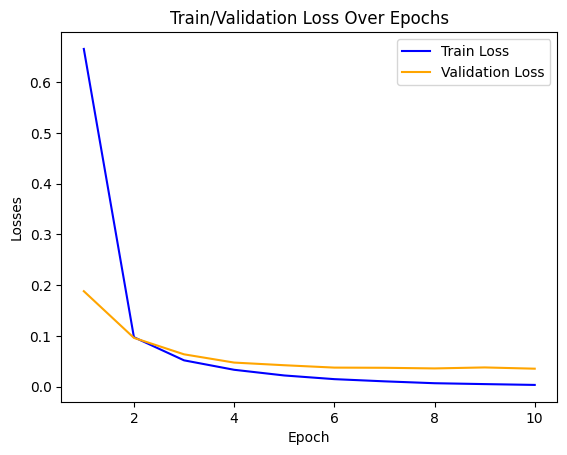

In [31]:
plot_losses(train_loss_per_epoch,val_loss_per_epoch)

In [24]:
result_stories = model.generate_text(last_out_train.detach(), my_tokenizer)
for i, story in enumerate(result_stories):
    print(f"Story {i+1}: {story}")
    print("-----------------------------------------------------------------------------------------------------------------------------------------------")


Story 1: He got a real kick out of his James Bond themed cake. My date and I went out dancing for his birthday. We also went out to spend some money at the casino. The live band and dancing meant a lot of fun for all. My boyfriend got a bit carried away as usual. unbothered sectioned racing television racing
-----------------------------------------------------------------------------------------------------------------------------------------------
Story 2: My work space, while small, is very functional. This one is rather oatmeal, I will admit. My cooled are always bath arranged under the cabinet. Everything has it s place and my lack wire Set storage trophy do a great job. Many of my books and skateboard disks are in the wooden bookshelf. those practice meals
-----------------------------------------------------------------------------------------------------------------------------------------------
Story 3: Some photographers love to catch photos of skaters Gotta out. Grafitti art

In [1]:
from t4 import T4Transformer, T4tokenizer
import torch
import torch.optim as optim
from torch.nn import CrossEntropyLoss
from transformers import BertTokenizer

/home/apassadaki/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
vocabulary_size_input = len(tokenizer.vocab) # BERT's vocabulary size
vocabulary_size_target = len(tokenizer.vocab) # BERT's vocabulary size
print(vocabulary_size_input, vocabulary_size_target)
embedding_dim = 512 
number_layers = 6
number_heads = 8
feed_forward_dim = 2048
my_device = torch.device('cuda:0')
print("DEVICE USED: ", my_device)
model = T4Transformer(vocab_size_input=vocabulary_size_input, vocab_size_target=vocabulary_size_target, d_model=embedding_dim, num_layers=number_layers, 
                        num_heads=number_heads, d_ff=feed_forward_dim, dropout=0.1, pad_token=0, device=my_device, name=None)

model.load_state_dict(torch.load(f'/data/admitosstorage/Phase_2/trained_models/auto/t4_combined_e2_i5314.pt'))#, map_location=my_device))
model.eval()
#model = model.to(my_device)
print("Okay with loading the model")

30522 30522
DEVICE USED:  cuda:0
Okay with loading the model


In [9]:
new_entry = (["you can't get to the lake from here but it is a great view",
   'A field that is near the waters of the beach.',
   'A tree in the forest has fallen over on the grass.',
   'A large group of deciduous trees are behind a grassy field.',
   'People walking down a hill with a bunch of animals on it.'],
  'It is right on the lake. This is our new property.  Here is the spot we are building our forever home. Life is good. It has a forest area. It also has a place for our cattle.')

new_captions = new_entry[0]
new_story = new_entry[1]
input_text = ' [SEP] '.join(new_captions)
print(input_text)
print()
print(new_story)
caption_ids = tokenizer(input_text, return_tensors="pt").input_ids
target_ids = tokenizer(new_story, return_tensors="pt").input_ids
caption_ids = caption_ids.to(my_device)
print()
print(caption_ids.shape)
print(target_ids.shape)

you can't get to the lake from here but it is a great view [SEP] A field that is near the waters of the beach. [SEP] A tree in the forest has fallen over on the grass. [SEP] A large group of deciduous trees are behind a grassy field. [SEP] People walking down a hill with a bunch of animals on it.

It is right on the lake. This is our new property.  Here is the spot we are building our forever home. Life is good. It has a forest area. It also has a place for our cattle.

torch.Size([1, 70])
torch.Size([1, 45])


In [10]:
# Generate narrative story
with torch.no_grad():
    generated_ids = model.generate(caption_ids, target_ids, tokenizer)
    print(generated_ids)
story = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
print(story)

tensor([[101]])
torch.Size([1, 1, 30522])
tensor([[101]], device='cuda:1')
gen step: 0 --> tensor([[101, 101]], device='cuda:1')
tensor([[101, 101]], device='cuda:1')
torch.Size([1, 2, 30522])
tensor([[1996]], device='cuda:1')
gen step: 1 --> tensor([[ 101,  101, 1996]], device='cuda:1')
tensor([[ 101,  101, 1996]], device='cuda:1')
torch.Size([1, 3, 30522])
tensor([[1996]], device='cuda:1')
gen step: 2 --> tensor([[ 101,  101, 1996, 1996]], device='cuda:1')
tensor([[ 101,  101, 1996, 1996]], device='cuda:1')
torch.Size([1, 4, 30522])
tensor([[1996]], device='cuda:1')
gen step: 3 --> tensor([[ 101,  101, 1996, 1996, 1996]], device='cuda:1')
tensor([[ 101,  101, 1996, 1996, 1996]], device='cuda:1')
torch.Size([1, 5, 30522])
tensor([[1996]], device='cuda:1')
gen step: 4 --> tensor([[ 101,  101, 1996, 1996, 1996, 1996]], device='cuda:1')
tensor([[ 101,  101, 1996, 1996, 1996, 1996]], device='cuda:1')
torch.Size([1, 6, 30522])
tensor([[1996]], device='cuda:1')
gen step: 5 --> tensor([[ 101

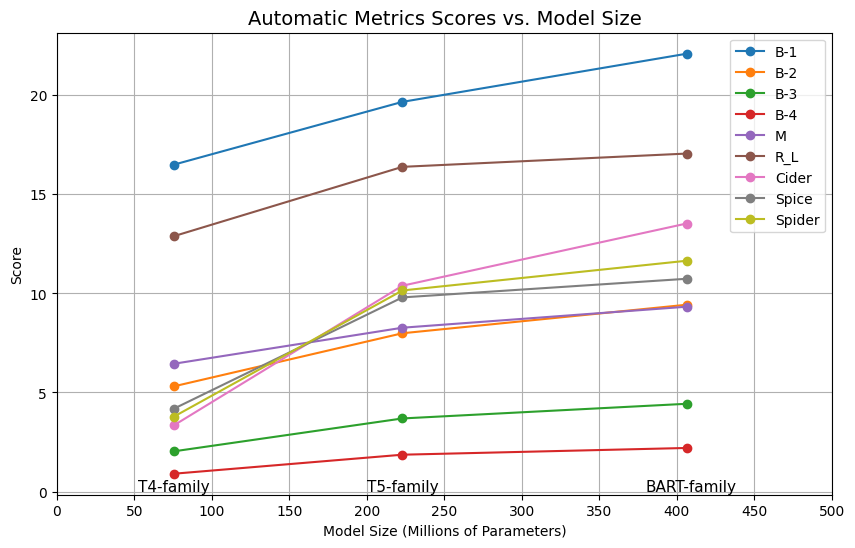

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
my_dict = {
    "B-1": [16.5, 19.67, 22.1],
    "B-2": [5.31, 7.99, 9.43],
    "B-3": [2.03, 3.69, 4.43],
    "B-4": [0.9, 1.86, 2.2],
    "M": [6.45, 8.27, 9.33],
    "R_L": [12.89, 16.39, 17.06],
    "Cider": [3.34, 10.39, 13.53],
    "Spice": [4.18, 9.8, 10.74],
    "Spider": [3.78, 10.15, 11.65]
}

# Parameters size (in millions)
param_sizes = [75425594, 222903552, 406291456]  # Actual sizes
x_values = [size / 1e6 for size in param_sizes]  # Convert to millions for the x-axis

# Plotting
plt.figure(figsize=(10, 6))
for metric, scores in my_dict.items():
    plt.plot(x_values, scores, marker='o', label=metric)

plt.xlabel("Model Size (Millions of Parameters)")
plt.ylabel("Score")
plt.text(52, 0, 'T4-family', fontsize = 11)
plt.text(200, 0, 'T5-family', fontsize = 11)
plt.text(380, 0, 'BART-family', fontsize = 11)

plt.title("Automatic Metrics Scores vs. Model Size", fontsize = 14)
plt.xticks(np.arange(0, 501, 50))  # Adjust the x-axis to show increments up to 500 million
plt.legend(loc='best')
plt.grid(True)
plt.show()
